# I. Merge 2 mảng tăng dần


In [14]:
def merge_sorted_arrays(arr1, arr2):
    """
    arr1, arr2 is increase array
    """
    i = len(arr1) - 1  # Pointer for arr1
    j = len(arr2) - 1  # Pointer for arr2
    k = len(arr1) + len(arr2) - 1  # Pointer for the merged array
    arr1.extend([0]*(len(arr2)))
    # Merge arr1 and arr2 in reverse order
    while i >= 0 and j >= 0:
        if arr1[i] > arr2[j]:
            arr1[k] = arr1[i]
            i -= 1
        else:
            arr1[k] = arr2[j]
            j -= 1
        k -= 1
    # If there are remaining elements in arr2, copy them to arr1
    while j >= 0:
        arr1[k] = arr2[j]
        j -= 1
        k -= 1
        
arr1 = [1, 3, 5, 7] 
arr2 = [0, 2, 6, 8, 9]

merge_sorted_arrays(arr1, arr2)
print(arr1)

[0, 1, 2, 3, 5, 6, 7, 8, 9]


# II.Customer-Churn

In [142]:
# Librabry
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, f1_score
from skimpy import skim
import optuna

## 2.1. Tải dữ liệu

In [9]:
url = "https://drive.google.com/file/d/1mBema4aaNk3Fanh1vX-VAsF765qCv80X/view"
file = url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(file)

## 2.2. Khám phá dữ liệu

In [15]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [16]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 17    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ SeniorCitizen        │    0 │      0 │   0.16 │   0.37 │    0 │     0 │      0 │      0 │      1 │ ▇    ▂  │  │
│ │ tenure               │    0 │      0 │     32 │     25 │    0 │     9 │     29 │     55 │     72 │ ▇▅▃▃▃▆  │  │
│ │ MonthlyCharges       │    0 │      0 │     65 │     30 │   18 │    36 │     70 │     90 │    120 │ ▇▃▃▇▇▃  │  │
│ │ TotalCharges         │   11 │   0.16 │   2300 │   2300 │   19 │   400 │   1400 │   3800 │   8700 │ ▇▃▂▂▁▁  │  │
│ └──────────────────────┴──────┴────────┴────────┴────────┴──────┴───────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  7043 │  │
│ │ gender                           │      0 │         0 │                          1 │                  7043 │  │
│ │ Partner                          │      0 │         0 │                          1 │                  7043 │  │
│ │ Dependents                       │      0 │         0 │                          1 │                  7043 │  │
│ │ PhoneService                     │      0 │         0 │                          1 │                  7043 │  │
│ │ MultipleLines                    │      0 │         0 │                        1.2 │                  8407 │  │
│ │ InternetService                  │      0 │         0 │                        1.4 │                 10139 │  │
│ │ OnlineSecurity                   │      0 │         0 │                        1.4 │                 10095 │  │
│ │ OnlineBackup                     │      0 │         0 │                        1.4 │                 10095 │  │
│ │ DeviceProtection                 │      0 │         0 │                        1.4 │                 10095 │  │
│ │ TechSupport                      │      0 │         0 │                        1.4 │                 10095 │  │
│ │ StreamingTV                      │      0 │         0 │                        1.4 │                 10095 │  │
│ │ StreamingMovies                  │      0 │         

In [107]:
Churn_Label_counts= df['Churn'].value_counts()
fig = px.pie(names= Churn_Label_counts.keys(), values= Churn_Label_counts.values, title='Churn Label Distribution')
fig.show()

## 2.3 Tiền xử lí

Lọc Nan & xoá cột

In [21]:
df = df.dropna()
df_cleaned = df.drop(columns = ['customerID'])

Feature engineering


In [82]:
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = df_cleaned.drop(columns= numeric_features + ['Churn']).columns

print(numeric_features)
print(categorical_features)

df_features = df_cleaned.drop(columns=['Churn'])
df_target = df_cleaned['Churn']

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


## 2.4. Chuẩn bị dữ liệu

### 2.4.1 Transform preprocessor

In [108]:
# Tạo transformers cho đặc trưng số và đặc trưng phân loại
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Tạo ColumnTransformer để áp dụng transformers cho các đặc trưng cụ thể
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### 2.4.2 Fit transform features

In [131]:
X_preprocessed = preprocessor.fit_transform(df_features)
X_df = pd.DataFrame(data = X_preprocessed)


label_encoder = LabelEncoder()
y_preprocessed = label_encoder.fit_transform(df_target)
y_df = pd.DataFrame(y_preprocessed)

df_preprocessed = pd.concat([X_df, y_df], axis=1, ignore_index=True)

### 2.4.3. Correlation

Có thể loại bỏ bớt các features có tương quan với nhau = 1

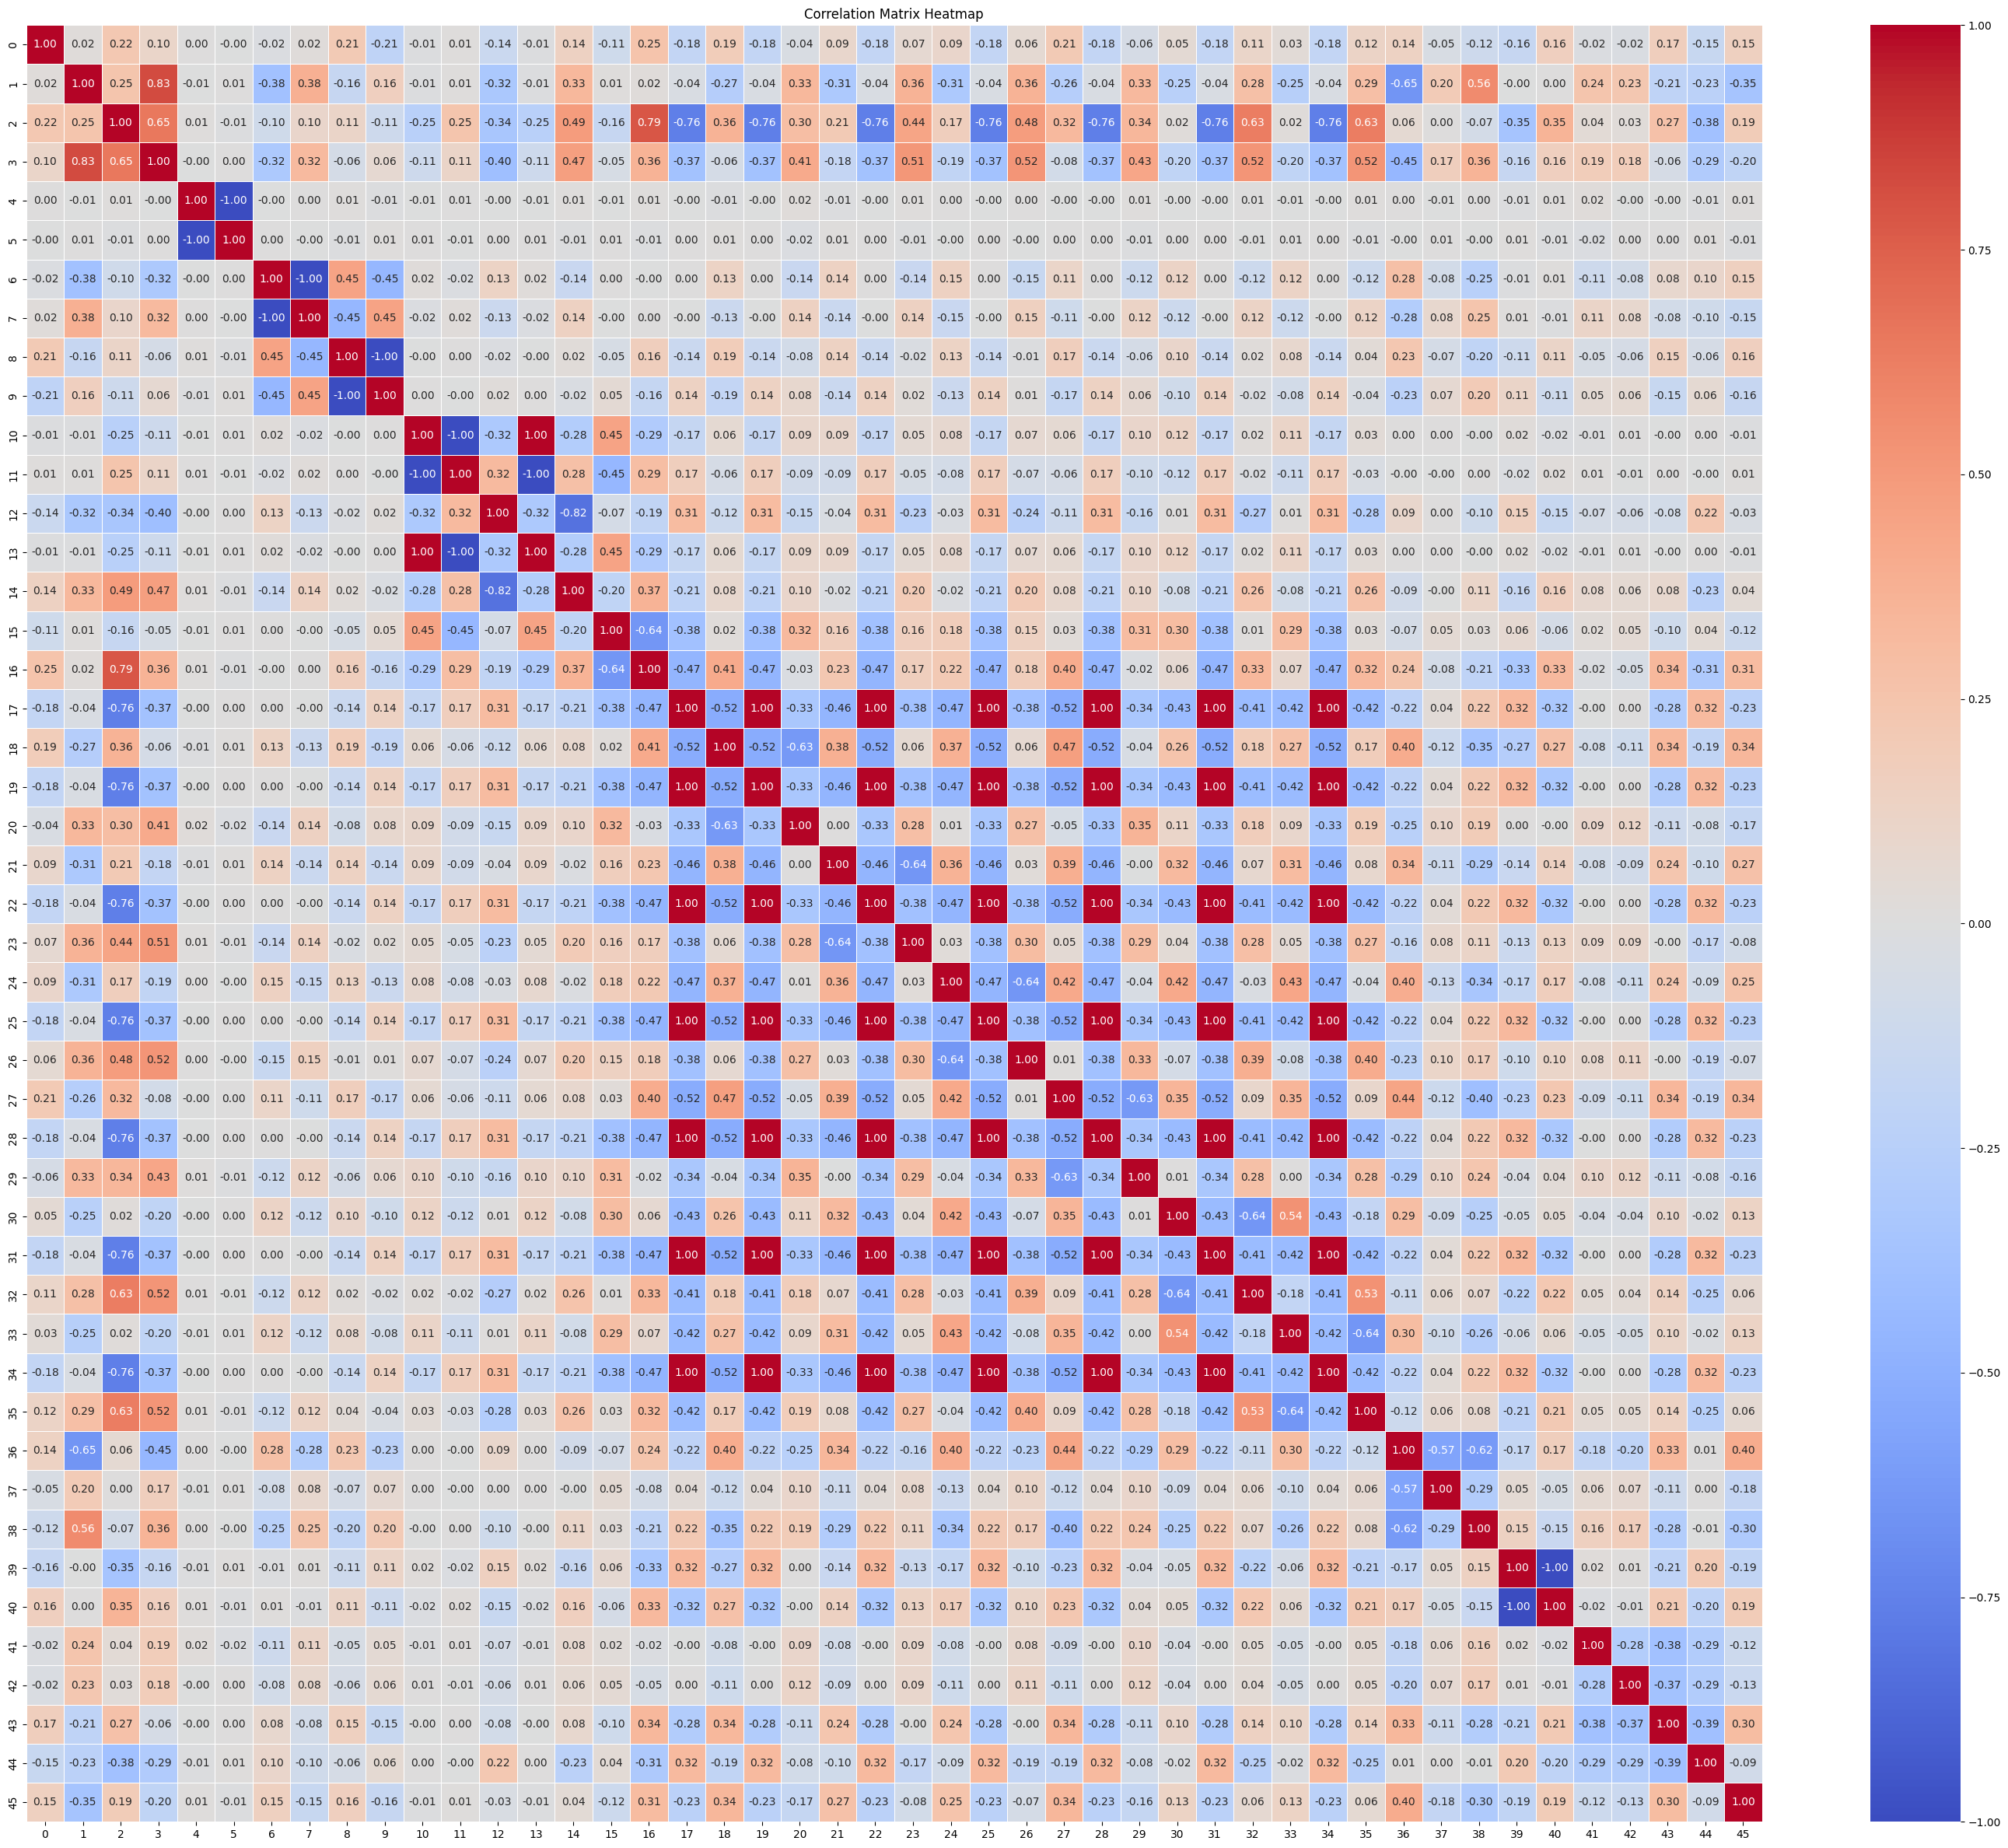

In [100]:
correlation_matrix = df_preprocessed.corr()

# Create a heatmap
plt.figure(figsize=(36, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 2.4.4. PPS

Đây là điểm số đánh giá khả năng của một feature trong viêc xây dựng dự đoán cho 1 feature khác 

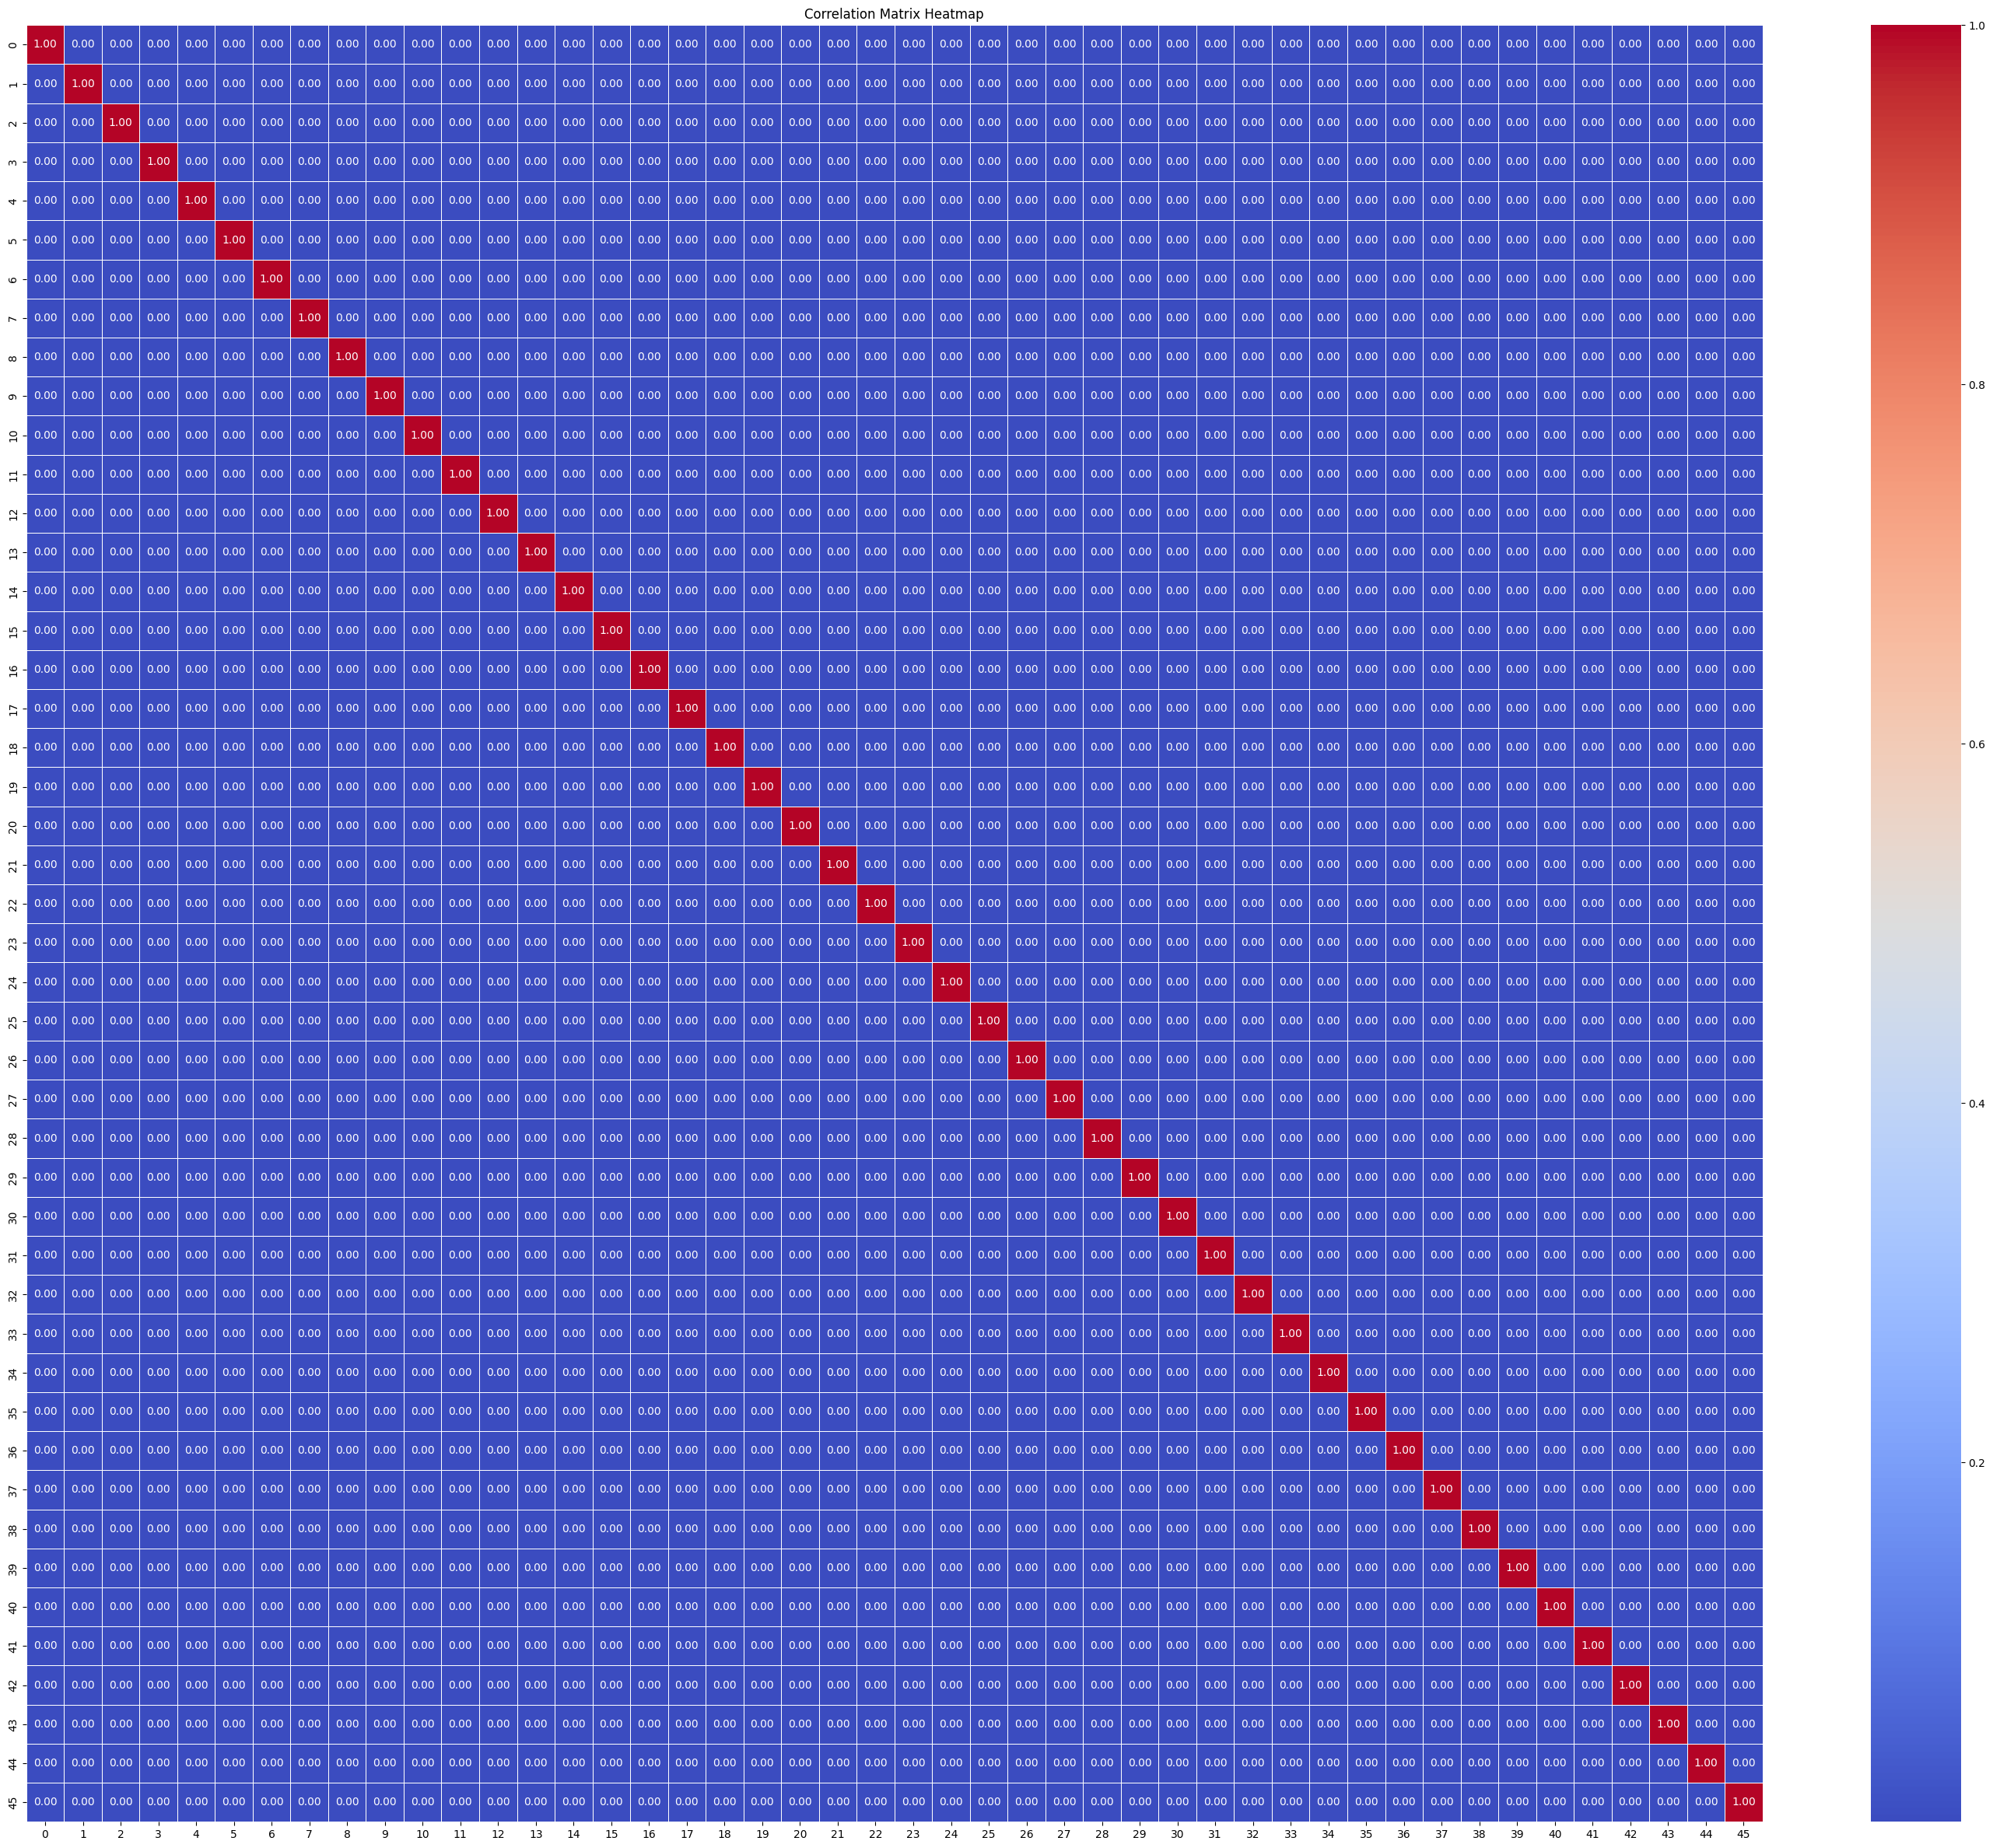

In [102]:
def calculate_pps_matrix(df):
    columns = df.columns
    pps_matrix = pd.DataFrame(index=columns, columns=columns, dtype=float)

    for col1 in columns:
        for col2 in columns:
            pps_matrix.loc[col1, col2] = 1.0 if col1 == col2 else calculate_pps(df, col1, col2)

    return pps_matrix

def calculate_pps(df, col1, col2):
    return (
        (df[col1].nunique() - 1) / df.shape[0] *
        (df[col2].nunique() - 1) / df.shape[0] *
        np.sum((df.groupby([col1, col2]).size() / df.shape[0])**2)
)
    
pps_matrix = calculate_pps_matrix(df_preprocessed)
# Create a heatmap
plt.figure(figsize=(36, 30))
sns.heatmap(pps_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_preprocessed, test_size=0.3, shuffle=True, random_state=42)

## 2.5. Huấn luyện mô hình

In [146]:
# Performance
def performance_metrics(y_true, y_pred):
    """ performance metric compute

    Args:
        y_true ([]): test target true
        y_pred ([]]): test target predict
    """
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("precision: ",  precision_score(y_test, y_pred))
    print("f1_score: ", f1_score(y_test, y_pred))

# Bias & Variance
def performance(model):
    """
    Bias & variance compute
    """
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(model, X_train, y_train, X_val, y_val, loss='mse')
    print(f'Average Expected Loss: {avg_expected_loss}')
    print(f'Average Bias: {avg_bias}')
    print(f'Average Variance: {avg_var}')
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(8, 4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,  color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    

In [140]:
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=3)
random_forest_model = RandomForestClassifier(random_state=42)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/homebrew/lib/python3.11/site-packages

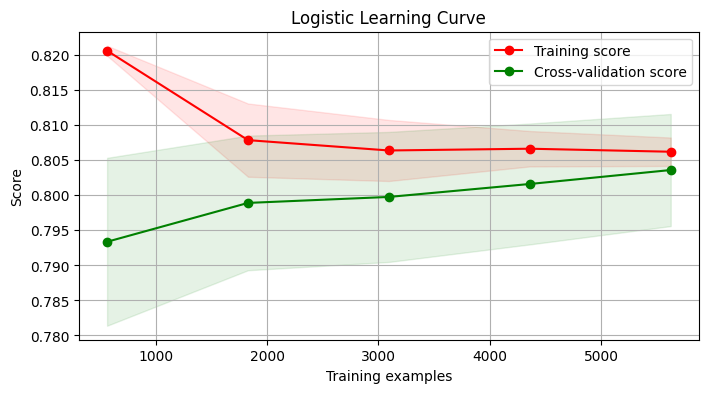

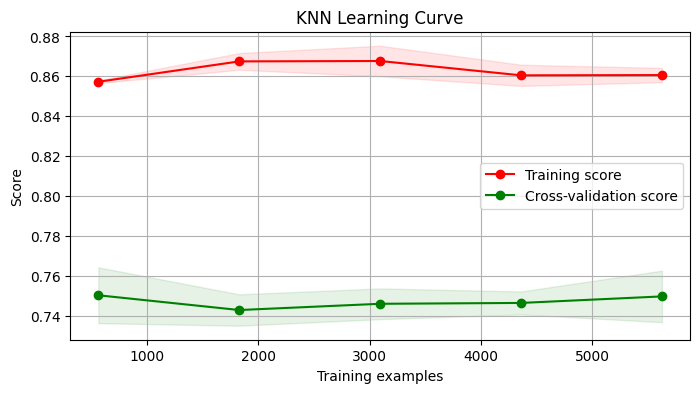

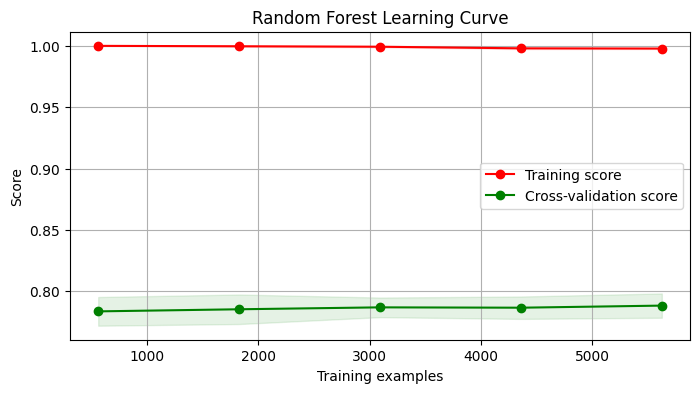

In [147]:
plot_learning_curve(logistic_model, "Logistic Learning Curve", X_preprocessed, y_preprocessed)
plot_learning_curve(knn_model, "KNN Learning Curve", X_preprocessed, y_preprocessed)
plot_learning_curve(random_forest_model, "Random Forest Learning Curve", X_preprocessed, y_preprocessed)

### 2.5.1 Logistics Regrestion

In [129]:
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

performance_metrics(y_test, logistic_pred)
performance()


accuracy:  0.795260663507109
precision:  0.6375266524520256
f1_score:  0.5805825242718446


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### 2.5.2 KNN


In [130]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

performance_metrics(y_test, knn_pred)


accuracy:  0.7483412322274882
precision:  0.5271739130434783
f1_score:  0.5229110512129379


### 2.5.3. Random Forest

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

performance_metrics(y_test, knn_pred)

### 2.5.4. Evaluation

### Nhận Xét

Do bộ dữ liệu mất cân bằng, mô hình có thể học cách dự đoán lớp đa số nhiều hơn. Kết quả là accuracy cao, nhưng precision và F1-score thấp

=> Underfitting lớp thiểu số

## 2.6. Resampling

Oversampling

Result

Undersampling

Result

## 2.7. Hyperparameter Tuning
Mô hình đào tạo với tham số cơ bản như trên có hiện tượng không diễn giải được bộ dữ liệu đào tạo lớn.
Cần tăng cường và tối độ phức tạp cho mô hình

### 2.7.1. Logistic Regression

In [148]:
def logistic_hyper(trial):
    # Define hyperparameters to optimize
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

    # Create a Logistic Regression model with the suggested hyperparameters
    logreg_model = LogisticRegression(C=C, solver=solver)

    # Calculate cross-validated accuracy
    score = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(logistic_hyper, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print('Best hyperparameters:', best_params)


[I 2023-11-23 07:49:51,008] A new study created in memory with name: no-name-14901c8a-1dc8-414b-8a31-5708620ad79b


/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_63933/948122485.py:3: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[I 2023-11-23 07:49:51,449] Trial 0 finished with value: 0.8023191366431431 and parameters: {'C': 0.18248579739986584, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.8023191366431431.
/var/folders/_x/886sy6k57y90dfy4fjklx08r0000gn/T/ipykernel_63933/948122485.py:3: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or sca

Best hyperparameters: {'C': 0.009931454689908935, 'solver': 'liblinear'}


### 2.7.2. KNN

In [149]:
def knn_hyper(trial):
    # Define hyperparameters to optimize
    n_neib
    # Create a Logistic Regression model with the suggested hyperparameters
    knn_model = KNeighborsClassifier(n_neighbors= trial.
    )

    # Calculate cross-validated accuracy
    score = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(knn_hyper, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print('Best hyperparameters:', best_params)


SyntaxError: invalid syntax (3565989617.py, line 6)

### 2.7.3. Random Forest

In [ ]:
def random_forest_hyper(trial):
    # Define hyperparameters to optimize
    n_neib
    # Create a Logistic Regression model with the suggested hyperparameters
    random_forest_model = RandomForestClassifier(
        
    )

    # Calculate cross-validated accuracy
    score = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Create an Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(random_forest_hyper, n_trials=100)

# Print the best hyperparameters
best_params = study.best_params
print('Best hyperparameters:', best_params)
